In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster.birch import birch, measurement_type
from pyclustering.cluster.bsas import bsas, bsas_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import cut_tree, linkage, dendrogram
from sklearn.metrics import silhouette_score

from col_names import *
from utility import *
from tmp import *

In [251]:

with open(f'{PICKLE_FOLDER}clustering_df.pkl','rb') as f:
    c_df = pickle.load(f)
with open(f'{PICKLE_FOLDER}pure_clustering_df.pkl', 'rb') as f:
    pc_df = pickle.load(f)


In [252]:
clustering_scores = pd.DataFrame(columns = ['silhouette', 'SSE'], dtype=float)
def store_clustering_scores(points, labels, algorithm_name):
    SSE = 0
    grouped = pd.DataFrame(points).groupby(pd.Series(labels))
    for i, group in grouped:
        center = group.mean(axis=0)
        SSE += np.sum((group - center) * (group - center)).sum()
    clustering_scores.loc[algorithm_name, 'SSE'] = SSE
    clustering_scores.loc[algorithm_name, 'silhouette'] = silhouette_score(points, labels)

In [253]:
data = StandardScaler().fit_transform(c_df)

## Hierarchical

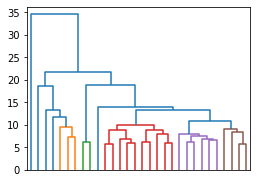

In [254]:
data_dist = pdist(data, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
plt.figure(figsize=(4,3))
plt.gca().xaxis.set_visible(False)
res = dendrogram(data_link, color_threshold=10.0, truncate_mode='lastp')


store_clustering_scores(data, cut_tree(data_link, n_clusters=8)[:,0], algorithm_name='hierarchical_complete')


In [255]:
labels = cut_tree(data_link, n_clusters=10)[:,0]
centers = pd.DataFrame(data).groupby(cut_tree(data_link, height=22)[:,0]).mean()

# clustering_plots(labels, centers, user_df.columns)
new_labels, new_centers = reoder_labels(labels, centers)


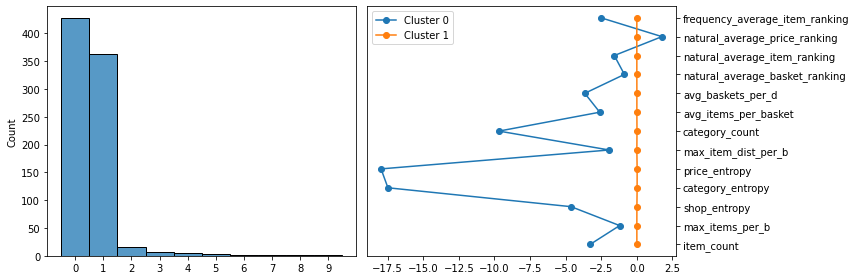

In [256]:

plot_clusters(new_labels, new_centers, c_df)


## FCM

In [257]:
initial_centers = kmeans_plusplus_initializer(data, 16, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
fcm_instance = fcm(data, initial_centers)
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()
# centers

In [258]:

sse = 0
for i, membership in enumerate(fcm_instance.get_membership()):
    distances_to_centers = [np.sqrt(np.sum((c - i) * (c - i))) for c in centers]
    sse += np.average(distances_to_centers, weights=membership)
clustering_scores.loc['fuzzy_C_Means', 'SSE'] = sse
sse

1222558.2779248357

In [259]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, data)
visualizer.show(pair_filter=[[0, 1], [0, 2]])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## BSAS

In [ ]:
max_clusters = 6
threshold = 0.001
bsas_instance = bsas(data, max_clusters, threshold)
bsas_instance.process()

In [ ]:
clusters = bsas_instance.get_clusters()
representatives= bsas_instance.get_representatives()

In [ ]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, data)
visualizer.show(max_row_size=2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
bsas_visualizer.show_clusters(data, clusters, representatives)

ValueError: Only objects with size dimension 1 (1D plot), 2 (2D plot) or 3 (3D plot) can be displayed. For multi-dimensional data use 'cluster_visualizer_multidim'.

## BIRCH

In [ ]:
birch_instance = birch(data, 6, 3)
birch_instance.process()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
clusters = bsas_instance.get_clusters()
representatives = representatives = bsas_instance.get_representatives()

In [ ]:
bsas_visualizer.show_clusters(c_df, clusters, representatives)

KeyError: 0